**PyImageJ Tutorial**

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

# 7 Running macros, scripts and plugins

PyImageJ supports running ImageJ macros, scripts and plugins. Checkout the examples below to see how each function works.  First let's initialize ImageJ with Fiji so we can use some plugins.

In [1]:
import imagej

# initialize ImageJ2 with Fiji plugins
ij = imagej.init('sc.fiji:fiji')
print(f"ImageJ2 version: {ij.getVersion()}")

10:16:45.548 [SciJava-13330e01-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:80)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:538)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:139)
	at sun.reflect.NativeConstructorAccessorImpl.newInsta

## 7.1 Using ImageJ macros: `ij.py.run_macro`

Running an original ImageJ style macro is as simple as providing the macro code in a string, and the arguments in a dictionary to `ij.py.run_macro`. Modify the following cell to print your name, age, and city.

In [2]:
macro = """
#@ String name
#@ int age
#@ String city
#@output Object greeting
greeting = "Hello " + name + ". You are " + age + " years old, and live in " + city + "."
"""
args = {
    'name': 'Chuckles',
    'age': 13,
    'city': 'Nowhere'
}
result = ij.py.run_macro(macro, args)
print(result.getOutput('greeting'))

Operating in headless mode - the original ImageJ will have limited functionality.


[INFO] script:macro.ijm = [[greeting], [Hello Chuckles. You are 13 years old, and live in Nowhere.]]
Hello Chuckles. You are 13 years old, and live in Nowhere.


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[greeting], [Hello Chuckles. You are 13 years old, and live in Nowhere.]]


## 7.2 Using scripts: `ij.py.run_script`
Running scripts in other languages is similar, but you also have to specify the language extension (_e.g._ 'py', 'ijm', 'js') or the language name (_e.g._ 'python', 'IJ1 Macro', 'javascipt') for the scripting language it is written in.

In [3]:
language_extension = 'ijm'
result_script = ij.py.run_script(language_extension, macro, args)
print(result_script.getOutput('greeting'))

[INFO] script:script.ijm = [[greeting], [Hello Chuckles. You are 13 years old, and live in Nowhere.]]
Hello Chuckles. You are 13 years old, and live in Nowhere.


[java.lang.Enum.toString] [INFO] script:script.ijm = [[greeting], [Hello Chuckles. You are 13 years old, and live in Nowhere.]]


## 7.3 Example: Run a plugin: `ij.py.run_plugin`

Finally, running plugins works in the same manner as macros. You simply enter the plugin name as a string and the arguments in a dict. For the few plugins that use ImageJ2 style macros (i.e., explicit booleans in the recorder), set the optional variable `ij1_style=False`.

This example works with original ImageJ windows, opening images entirely within ImageJ and then getting the results. Working with original ImageJ windows requires importing another class, which is done using the `jimport` function of scyjava.

In [4]:
ij.py.run_macro("""run("Blobs (25K)");""")
blobs = ij.WindowManager.getCurrentImage()
print(blobs)

Operating in headless mode - the WindowManager class will not be fully functional.


img["blobs.gif" (-3), 8-bit, 256x254x1x1x1]


Now let's view the blobs.

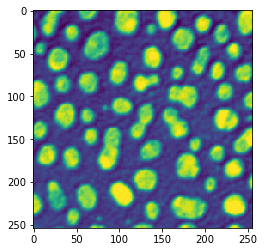

In [5]:
ij.py.show(blobs)

We can now run plugins that require open original ImageJ windows on blobs

In [6]:
# NB: This is not a built-in ImageJ command! It is the
# Plugins › Integral Image Filters › Mean command,
# which is part of mpicbg_, which is included with Fiji.
plugin = 'Mean'
args = { 
    'block_radius_x': 10,
    'block_radius_y': 10
}
ij.py.run_plugin(plugin, args)

Operating in headless mode - the IJ class will not be fully functional.


Next, obtain the current image from the `WindowManager` and display the results from the plugin.

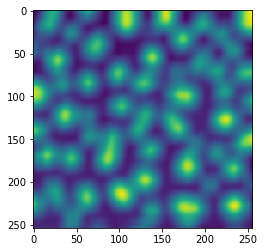

In [7]:
result = ij.WindowManager.getCurrentImage()
result = ij.py.show(result)

You can list any active original ImageJ windows with the following command.

In [8]:
print(type(ij.window().getOpenWindows()))

<java class 'java.util.Collections.UnmodifiableRandomAccessList'>


In [9]:
print(ij.window().getOpenWindows())

[blobs.gif]


You can close any original ImageJ windows through the following command.

NOTE this is only true for ImageJ2's `WindowService`. Add info about the `WindowManager` and old school imagej stuff.

In [10]:
ij.window().clear()
print(ij.window().getOpenWindows())

[]
